**TBATS**: periodo di 2 anni più tre mesi 2022, osservazioni giornaliere, due stagionalità: settimanale e annuale

**T**rigonometric seasonality, **B**ox-Cox transformation, **A**RMA errors, **T**rend and **S**easonal components.

![tbats](https://miro.medium.com/max/1050/1*yfruZnSYsNt1X1uyag46eQ.png)

Each seasonality is modeled by a trigonometric representation based on Fourier series. One major advantage of this approach is that it requires only 2 seed states regardless of the length of period. Another advantage is the ability to model seasonal effects of non-integer lengths. For example, given a series of daily observations, one can model leap years with a season of length 365.25.

**BATS** differs from TBATS only in the way it models seasonal effects. In BATS we have a more traditional approach where each seasonality is modeled by:

![bats](https://miro.medium.com/max/1050/1*D8KY2jQRmVRLHY5f4RNqKA.png)

This implies that BATS can only model integer period lengths. Approach taken in BATS requires m_i seed states for season i, if this season is long the model may become intractable.

How Does TBATS Choose The Final Model

Under the hood TBATS will consider various alternatives and fit quite a few models. It will consider models:
- with Box-Cox transformation and without it.
- with and without Trend
- with and without Trend Damping
- with and without ARMA(p,q) process used to model residuals
- non-seasonal model
- various amounts of harmonics used to model seasonal effects

The final model will be chosen using Akaike information criterion (AIC).

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tbats import BATS, TBATS

In [3]:
df = pd.read_csv('./data/serie-storiche-ecommerce-pulito-no-buchi-temporali.csv')
df.head()

,Unnamed: 0,data,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
0,0,2014-01-01,NaN,0.0,Pesca,2014,Gennaio,1,1
1,1,2014-01-02,NaN,0.0,Pesca,2014,Gennaio,2,1
2,2,2014-01-03,NaN,0.0,Pesca,2014,Gennaio,3,1
3,3,2014-01-04,NaN,0.0,Pesca,2014,Gennaio,4,1
4,4,2014-01-05,NaN,0.0,Pesca,2014,Gennaio,5,1


In [4]:
df = df[(df['settore'] == 'Pesca')] # df solo pesca
df['data'] = pd.to_datetime(df['data'])

In [5]:
df.dtypes

Unnamed: 0             int64
data          datetime64[ns]
new_index            float64
totale               float64
settore               object
Anno                   int64
Mese                  object
Giorno                 int64
Mese (n°)              int64
dtype: object

In [6]:
df.head()

,Unnamed: 0,data,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
0,0,2014-01-01,NaN,0.0,Pesca,2014,Gennaio,1,1
1,1,2014-01-02,NaN,0.0,Pesca,2014,Gennaio,2,1
2,2,2014-01-03,NaN,0.0,Pesca,2014,Gennaio,3,1
3,3,2014-01-04,NaN,0.0,Pesca,2014,Gennaio,4,1
4,4,2014-01-05,NaN,0.0,Pesca,2014,Gennaio,5,1


In [7]:
mask = (df['data'] > '2019-12-31') & (df['data'] <= '2022-03-31')

In [8]:
df = df.loc[mask]

In [9]:
df.head()

,Unnamed: 0,data,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
2191,2191,2020-01-01,18077.0,9128.23,Pesca,2020,Gennaio,1,1
2192,2192,2020-01-02,18084.0,9725.06,Pesca,2020,Gennaio,2,1
2193,2193,2020-01-03,18093.0,7932.93,Pesca,2020,Gennaio,3,1
2194,2194,2020-01-04,18102.0,19443.31,Pesca,2020,Gennaio,4,1
2195,2195,2020-01-05,18111.0,14119.03,Pesca,2020,Gennaio,5,1


In [10]:
df = df.set_index('data')
df.head()

,Unnamed: 0,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
data,,,,,,,,
2020-01-01,2191,18077.0,9128.23,Pesca,2020,Gennaio,1,1
2020-01-02,2192,18084.0,9725.06,Pesca,2020,Gennaio,2,1
2020-01-03,2193,18093.0,7932.93,Pesca,2020,Gennaio,3,1
2020-01-04,2194,18102.0,19443.31,Pesca,2020,Gennaio,4,1
2020-01-05,2195,18111.0,14119.03,Pesca,2020,Gennaio,5,1


In [11]:
df = df[['settore', 'totale']]
df.head()

,settore,totale
data,,
2020-01-01,Pesca,9128.23
2020-01-02,Pesca,9725.06
2020-01-03,Pesca,7932.93
2020-01-04,Pesca,19443.31
2020-01-05,Pesca,14119.03


In [12]:
y = df['totale']

In [13]:
steps = 90

y_to_train = y.iloc[:(len(y)-steps)]
y_to_test = y.iloc[(len(y)-steps):] # last year for testing

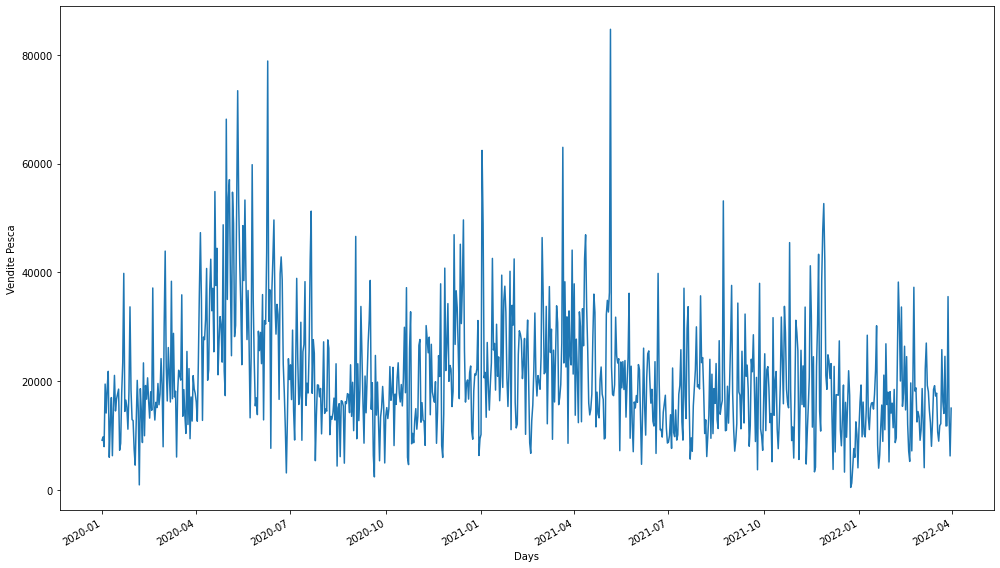

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['totale'])
ax.set_xlabel('Days')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

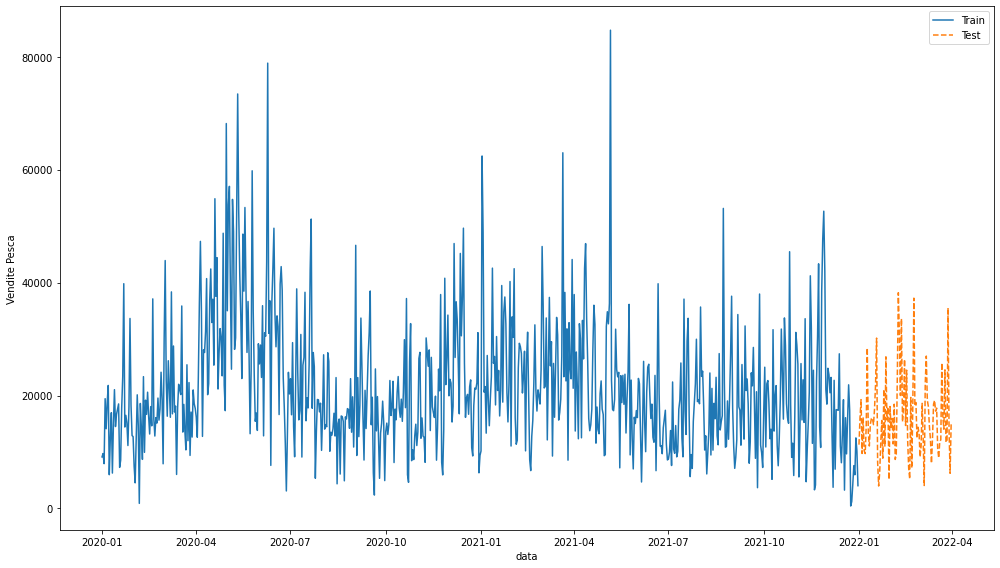

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_to_train, ls='-', label='Train')
ax.plot(y_to_test, ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite Pesca')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

Da questa figura dovremmo individuare pattern di stagionalità. (Ad esempio settimanale, mensile, annuale, ecc.)

Before we implement our more complex BATS and TBATS models, it’s always a good idea to have a baseline model. That way, we can determine if our more complex forecasting methods are actually performant.

In [16]:
y_pred_baseline = y_to_train[-steps:].values

Nell'esempio sotto inseriamo stagionalità settimanale (7?)

In [17]:
# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25)) # weekly and yearly seasonality
model = estimator.fit(y_to_train)

# Forecast 365 days ahead
y_forecast = model.forecast(steps)

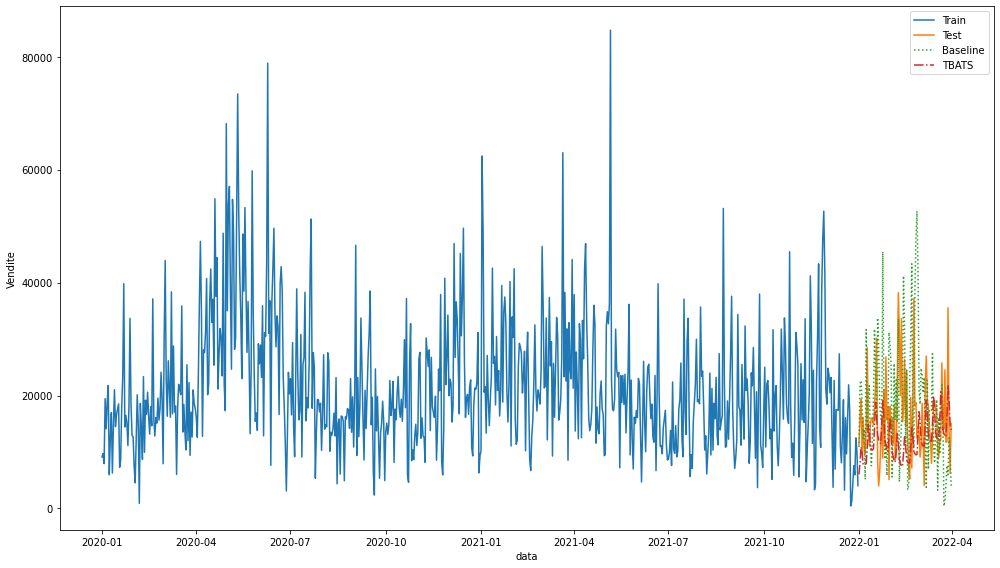

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(y_to_train, ls='-', label='Train')
ax.plot(y_to_test, ls='-', label='Test')
ax.plot(y_to_test.index, y_pred_baseline, ls=':', label='Baseline')
ax.plot(y_to_test.index, y_forecast, ls='-.', label='TBATS')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

MAPE

In [19]:
print('Did the model fit?', model.is_fitted)  # Model may fail to fit in edge-case situations
print('AIC', model.aic)  # may be np.inf

Did the model fit? True
AIC 18168.80503832113


In [20]:
# Short model summary
print('\n\nSUMMARY FUNCTION\n\n')
print(model.summary())



SUMMARY FUNCTION


Use Box-Cox: True
Use trend: False
Use damped trend: False
Seasonal periods: [  7.   365.25]
Seasonal harmonics [ 2 11]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.000092
Smoothing (Alpha): 0.061148
Seasonal Parameters (Gamma): [-0.00101584  0.0030611  -0.00412326 -0.00058725]
AR coefficients []
MA coefficients []
Seed vector [ 9.74388757e+00  4.82678795e-02 -6.65951134e-02 -2.35138921e-01
  2.94230384e-02 -6.66729996e-02 -7.19915467e-02  2.70514969e-02
 -6.14223872e-02 -4.65736151e-02 -2.26937427e-02 -4.17083788e-02
 -1.09841152e-01  1.47112613e-03 -7.05278381e-02  3.45804758e-02
  1.08508217e-01 -1.50000809e-01 -5.36609818e-02 -8.17188349e-03
 -2.63775435e-02  2.77678420e-02  2.46335520e-02  4.80524478e-02
  7.76993426e-02 -2.86853776e-02 -7.62822792e-03]

AIC 18168.805038


In [21]:
print('\n\nIN SAMPLE PREDICTIONS\n\n')
print('Original time series (5 first values)', model.y[:5])
print('Predictions (5 first values)', model.y_hat[:5])
print('Residuals (5 first values)', model.resid[:5])



IN SAMPLE PREDICTIONS


Original time series (5 first values) [ 9128.23  9725.06  7932.93 19443.31 14119.03]
Predictions (5 first values) [10864.30809453 10000.18530907  9337.90352556  9336.41504178
 12376.95851654]
Residuals (5 first values) [-1736.07809453  -275.12530907 -1404.97352556 10106.89495822
  1742.07148346]


In [22]:
steps = steps # one year in this case
y_forecasted = model.forecast(steps=steps)

In [23]:
print('\n\nFORECAST\n\n')
print('Values', y_forecasted)
print('MAE', np.mean(np.abs(y_forecasted - y_to_test)))



FORECAST


Values [ 6027.99287996  8126.92311435 10900.93857131  9846.30335195
  7908.95371233  7727.65837694  7705.32190151  7986.23173092
 10940.256845   14829.15528437 13461.48585023 10808.19025917
 10500.56986659 10358.97603734 10573.13392498 14202.74372807
 18805.96454016 16622.03696974 12958.96903959 12198.91390318
 11642.42004698 11485.25777238 14906.5361802  19075.94507789
 16309.12414259 12316.33503188 11252.01604066 10446.94936509
 10054.18935429 12771.08230429 16050.87049171 13527.71257956
 10110.06912194  9177.58303974  8501.06663828  8195.25188605
 10468.28903435 13280.14810355 11337.10726894  8609.8501891
  7964.74734836  7536.71713027  7437.15843697  9739.16447445
 12679.38329796 11114.06118832  8666.54783837  8227.88524081
  7982.49776381  8064.55809025 10792.12119228 14326.18237469
 12771.8934295  10101.2127501   9697.86475538  9485.46175661
  9631.42355833 12914.68332377 17127.94969931 15214.02444599
 11959.14220047 11386.65552134 11025.13171028 11066.31315863
 1465

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_forecasted), np.array(y_to_test)
    return np.mean(np.abs((y_forecasted - y_to_test) / y_forecasted)) * 100

In [25]:
print('MAPE', mean_absolute_percentage_error(y_forecasted, y_to_test))

MAPE 56.92896003975976
